<a href="https://colab.research.google.com/github/sheraphineshovan/Imarticus_miniproject/blob/main/Mobile_price_prediction%5BNaive_Bayes%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency

import data

In [ ]:
df = pd.read_csv('Mobile_price.csv')
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [ ]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [ ]:
df.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

In [ ]:
sns.pairplot(df)

<Axes: >

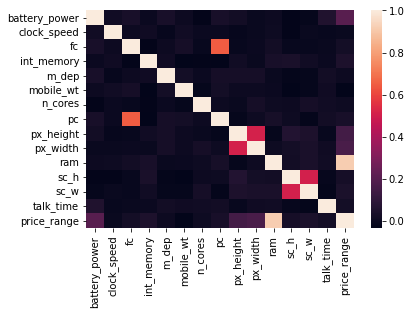

In [ ]:
sns.heatmap(df.corr())

split

In [ ]:
x = df.iloc[:, :-1]
y = df["price_range"]
print(x.shape)
print(y.shape)

(2000, 14)
(2000,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1600, 14)
(1600,)
(400, 14)
(400,)


In [ ]:
def acc_report(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    cm_matrix = confusion_matrix(actual, predicted)
    class_report = classification_report(actual, predicted)
    print(acc_score)
    print(cm_matrix)
    print(class_report)


all the other tests

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predlrtrain = lr.predict(x_train)
predlrtest  = lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
acc_report(y_train, predlrtrain)
acc_report(y_test, predlrtest)

0.6425
[[332  76   5   0]
 [ 67 216  89  28]
 [  1  91 174 118]
 [  0   4  93 306]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       413
           1       0.56      0.54      0.55       400
           2       0.48      0.45      0.47       384
           3       0.68      0.76      0.72       403

    accuracy                           0.64      1600
   macro avg       0.64      0.64      0.64      1600
weighted avg       0.64      0.64      0.64      1600

0.635
[[65 22  0  0]
 [20 61 13  6]
 [ 0 29 44 43]
 [ 0  0 13 84]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        87
           1       0.54      0.61      0.58       100
           2       0.63      0.38      0.47       116
           3       0.63      0.87      0.73        97

    accuracy                           0.64       400
   macro avg       0.64      0.65      0.63       400
weighted avg       0.64      0.64 

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)
preddtrain = dtree.predict(x_train)
preddtest = dtree.predict(x_test)


In [ ]:
acc_report(y_train, preddtrain)
acc_report(y_test, preddtest)

0.77375
[[333  80   0   0]
 [ 29 320  51   0]
 [  0  82 274  28]
 [  0   0  92 311]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       413
           1       0.66      0.80      0.73       400
           2       0.66      0.71      0.68       384
           3       0.92      0.77      0.84       403

    accuracy                           0.77      1600
   macro avg       0.79      0.77      0.78      1600
weighted avg       0.79      0.77      0.78      1600

0.75
[[69 18  0  0]
 [10 80 10  0]
 [ 0 27 78 11]
 [ 0  0 24 73]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        87
           1       0.64      0.80      0.71       100
           2       0.70      0.67      0.68       116
           3       0.87      0.75      0.81        97

    accuracy                           0.75       400
   macro avg       0.77      0.75      0.76       400
weighted avg       0.76      0.75 

In [ ]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(x_train, y_train)
predrftrain = rf.predict(x_train)
predrftest = rf.predict(x_test)

In [ ]:
acc_report(y_train, predrftrain)
acc_report(y_test, predrftest)

0.923125
[[404   9   0   0]
 [ 22 352  26   0]
 [  0  45 323  16]
 [  0   0   5 398]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       413
           1       0.87      0.88      0.87       400
           2       0.91      0.84      0.88       384
           3       0.96      0.99      0.97       403

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600

0.8375
[[87  0  0  0]
 [12 79  9  0]
 [ 0 26 78 12]
 [ 0  0  6 91]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        87
           1       0.75      0.79      0.77       100
           2       0.84      0.67      0.75       116
           3       0.88      0.94      0.91        97

    accuracy                           0.84       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.84      0.

In [ ]:
gboost = GradientBoostingClassifier(max_depth=3)
gboost.fit(x_train, y_train)
predgboostrain = gboost.predict(x_train)
predgboostest = gboost.predict(x_test)


In [ ]:
acc_report(y_train, predgboostrain)
acc_report(y_test, predgboostest)

0.999375
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 383   1]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

0.9025
[[84  3  0  0]
 [ 7 89  4  0]
 [ 0  9 98  9]
 [ 0  0  7 90]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.88      0.89      0.89       100
           2       0.90      0.84      0.87       116
           3       0.91      0.93      0.92        97

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.

In [ ]:

adboost = AdaBoostClassifier()
adboost.fit(x_train, y_train)
predadboostrain = adboost.predict(x_train)
predadboostest = adboost.predict(x_test)

In [ ]:
acc_report(y_train, predadboostrain)
acc_report(y_test, predadboostest)

0.766875
[[275 138   0   0]
 [ 31 303  66   0]
 [  0  37 314  33]
 [  0   0  68 335]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.76       413
           1       0.63      0.76      0.69       400
           2       0.70      0.82      0.75       384
           3       0.91      0.83      0.87       403

    accuracy                           0.77      1600
   macro avg       0.79      0.77      0.77      1600
weighted avg       0.79      0.77      0.77      1600

0.775
[[56 31  0  0]
 [11 71 18  0]
 [ 0  8 99  9]
 [ 0  0 13 84]]
              precision    recall  f1-score   support

           0       0.84      0.64      0.73        87
           1       0.65      0.71      0.68       100
           2       0.76      0.85      0.80       116
           3       0.90      0.87      0.88        97

    accuracy                           0.78       400
   macro avg       0.79      0.77      0.77       400
weighted avg       0.78      0.7

knn

In [ ]:
np.sqrt(2000)

44.721359549995796

In [ ]:
knn = KNeighborsClassifier(n_neighbors=35 )
knn.fit(x_train, y_train)
predknntrain = knn.predict(x_train)
predknntest = knn.predict(x_test)

In [ ]:
acc_report(y_train, predknntrain)
acc_report(y_test, predknntest)

0.93875
[[406   7   0   0]
 [ 14 371  15   0]
 [  0  25 337  22]
 [  0   0  15 388]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       413
           1       0.92      0.93      0.92       400
           2       0.92      0.88      0.90       384
           3       0.95      0.96      0.95       403

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

0.925
[[ 86   1   0   0]
 [  7  90   3   0]
 [  0   8 102   6]
 [  0   0   5  92]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.91      0.90      0.90       100
           2       0.93      0.88      0.90       116
           3       0.94      0.95      0.94        97

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.93       400
weighted avg     

xgboost

In [ ]:
#%pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
dtest_clf = xgb.DMatrix(x_test, y_test)
dtrain_clf = xgb.DMatrix(x_train, y_train)

In [ ]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100,tree_methods='hist')
xgb_classifier.fit(x_train,y_train)
xgb_pred_train=xgb_classifier.predict(x_train)
xgb_pred_test=xgb_classifier.predict(x_test)


[13:29:37] WARNING: ../src/learner.cc:767: 
Parameters: { "tree_methods" } are not used.



In [ ]:
acc_report(y_train, xgb_pred_train)
acc_report(y_test, xgb_pred_test)

1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

0.915
[[84  3  0  0]
 [ 4 93  3  0]
 [ 0  8 99  9]
 [ 0  0  7 90]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        87
           1       0.89      0.93      0.91       100
           2       0.91      0.85      0.88       116
           3       0.91      0.93      0.92        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92    

app deployment

In [ ]:
%pip install Gradio

In [ ]:
import pickle
import gradio as gr

In [ ]:
with open('knn_model.pkl','wb') as f:
    pickle.dump(svc,f)

In [ ]:
def make_prediction(battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time):
    with open('knn_model.pkl','rb') as f:
        clf=pickle.load(f)
        preds=clf.predict([[battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time]])
        if preds==0:
            return 'Low cost'
        elif preds==1:
            return 'Low-Medium cost'
        elif preds==2:
            return 'Medium-High cost'
        else:
            return 'High cost'


In [ ]:
battery_power=gr.Number(label="Enter Average battery power btw 501-2000 : ")
clock_speed=gr.Number(label="Enter Clock Speed btw 0.5-3 : ")
fc=gr.Number(label="Enter fc btw 0-19 : ")
int_memory=gr.Number(label="Enter int_mem btw2-64 : ")
m_dep=gr.Number(label="Enter m_dep btw 0.1-1 : ")
mobile_wt=gr.Number(label="Enter weight btw 80-200 : ")
n_cores=gr.Number(label="Enter cores btw 1-8 : ")
pc=gr.Number(label="Enter pc btw 0-20 : ")
px_height=gr.Number(label="Enter height btw 0-1960 : ")
px_width=gr.Number(label="Enter width btw 500-1998 : ")
ram=gr.Number(label="Enter ram 256-3998 : ")
sc_h=gr.Number(label="Enter sc_h btw 5-19 : ")
sc_w=gr.Number(label="Enter sc_w btw 0-18 : ")
talk_time=gr.Number(label="Enter talktime btw 2-20 : ")

output=gr.Textbox()

In [ ]:
app=gr.Interface(fn=make_prediction,inputs=[battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time],outputs=output)
app.launch(debug=True,share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c35bc789f54f9f2ae1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel = 'poly')
svc.fit(x_train,y_train)
svc_preds_train = svc.predict(x_train)
svc_preds_test = svc.predict(x_test)

In [ ]:
def model_eval(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    cm_matrix = confusion_matrix(actual, predicted)
    class_report = classification_report(actual, predicted)
    print(acc_score)
    print(cm_matrix)
    print(class_report)

In [ ]:
model_eval(y_train,svc_preds_train)

0.963125
[[413   0   0   0]
 [ 12 381   7   0]
 [  0  14 355  15]
 [  0   0  11 392]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       413
           1       0.96      0.95      0.96       400
           2       0.95      0.92      0.94       384
           3       0.96      0.97      0.97       403

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
model_eval(y_test,svc_preds_test)

0.9375
[[ 87   0   0   0]
 [ 10  89   1   0]
 [  0   5 106   5]
 [  0   0   4  93]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        87
           1       0.95      0.89      0.92       100
           2       0.95      0.91      0.93       116
           3       0.95      0.96      0.95        97

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



Dataset is Uniformly distributed so there is no need for SMOTE implementation

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [ ]:
model_eval(y_train,preds_gb_train)


0.81625
[[372  41   0   0]
 [ 30 293  77   0]
 [  0  65 281  38]
 [  0   1  42 360]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       413
           1       0.73      0.73      0.73       400
           2       0.70      0.73      0.72       384
           3       0.90      0.89      0.90       403

    accuracy                           0.82      1600
   macro avg       0.82      0.81      0.82      1600
weighted avg       0.82      0.82      0.82      1600



In [ ]:
model_eval(y_test,preds_gb_test)

0.8225
[[82  5  0  0]
 [ 8 78 14  0]
 [ 0 22 81 13]
 [ 0  0  9 88]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        87
           1       0.74      0.78      0.76       100
           2       0.78      0.70      0.74       116
           3       0.87      0.91      0.89        97

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.82      0.82      0.82       400

